## Importing Libraries and Dataset

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:\Become Assessment\SalesData.csv')

In [96]:
df.head(12)

,Month,Year 1 Sales,Year 2 Sales
0,January,1154,1295
1,February,1261,1426
2,March,1347,1526
3,April,1306,1386
4,May,1055,1128
5,June,1001,1144
6,July,955,1000
7,August,975,1120
8,September,1094,1208
9,October,1357,1520


## Analysis

### Sales Comparison

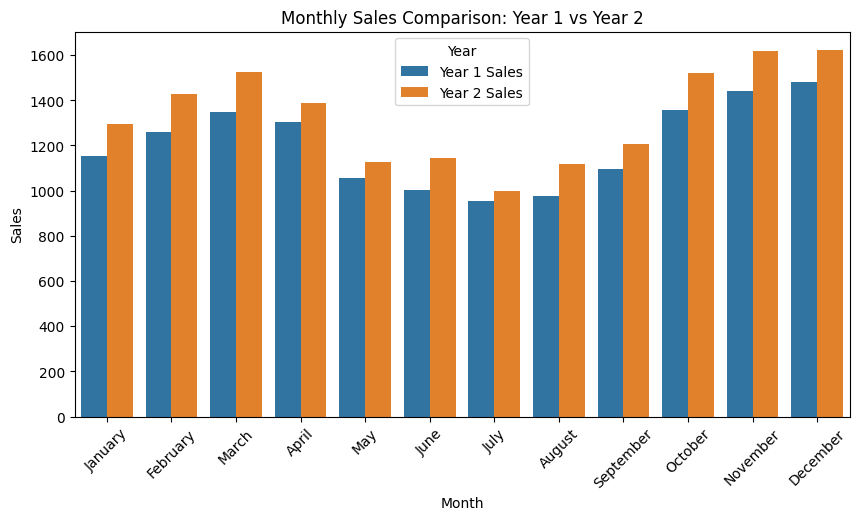

In [97]:
# Reshape the data to long format
df_melted = df.melt(id_vars="Month", var_name="Year", value_name="Sales")

plt.figure(figsize=(10, 5))
sns.barplot(x="Month", y="Sales", hue="Year", data=df_melted)

# Formatting
plt.title("Monthly Sales Comparison: Year 1 vs Year 2")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Year")
plt.show()


### Growth %

In [98]:
df['Growth'] = ((df['Year 2 Sales'] - df['Year 1 Sales']) / df['Year 2 Sales']) * 100

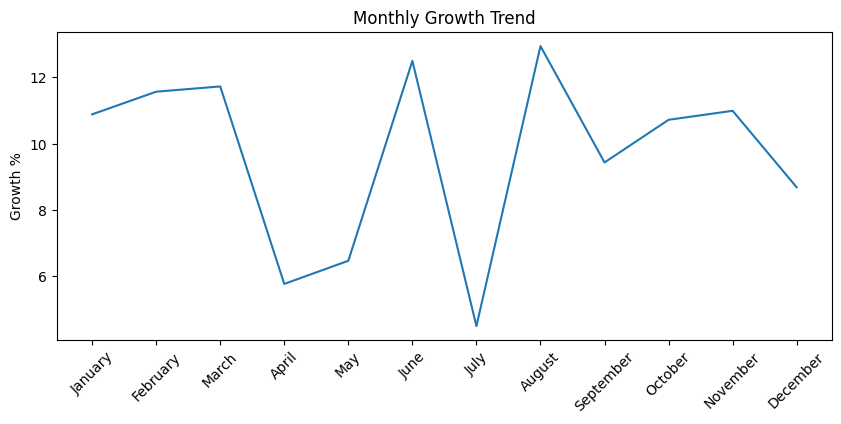

In [99]:
plt.figure(figsize=(10,4))

sns.lineplot(x=df['Month'],y=df['Growth'])

plt.ylabel('Growth %')
plt.xlabel('')
plt.xticks(rotation=45)
plt.title('Monthly Growth Trend')
plt.show()


### Sales Forecast for Year 3

Since our dataset is very small and limited, the ML forecast models won't be of much use here, for example ARIMA typically requires greater than 50 data points to be effective while we only have 24 and then there's also the risk of overfitting. There are many other ways we can effectively forecast the sales without the use of any ML models one such method is the use of the monthly growth rates. Assuming the growth rates are constant we can easily derive the sales numbers for the Year 3.

In [100]:
df['Year 3 Sales'] = df['Year 2 Sales'] * (df['Growth'] / 100) + df['Year 2 Sales']

In [101]:
df

,Month,Year 1 Sales,Year 2 Sales,Growth,Year 3 Sales
0,January,1154,1295,10.888031,1436.0
1,February,1261,1426,11.570827,1591.0
2,March,1347,1526,11.730013,1705.0
3,April,1306,1386,5.772006,1466.0
4,May,1055,1128,6.471631,1201.0
5,June,1001,1144,12.500000,1287.0
6,July,955,1000,4.500000,1045.0
7,August,975,1120,12.946429,1265.0
8,September,1094,1208,9.437086,1322.0
9,October,1357,1520,10.723684,1683.0


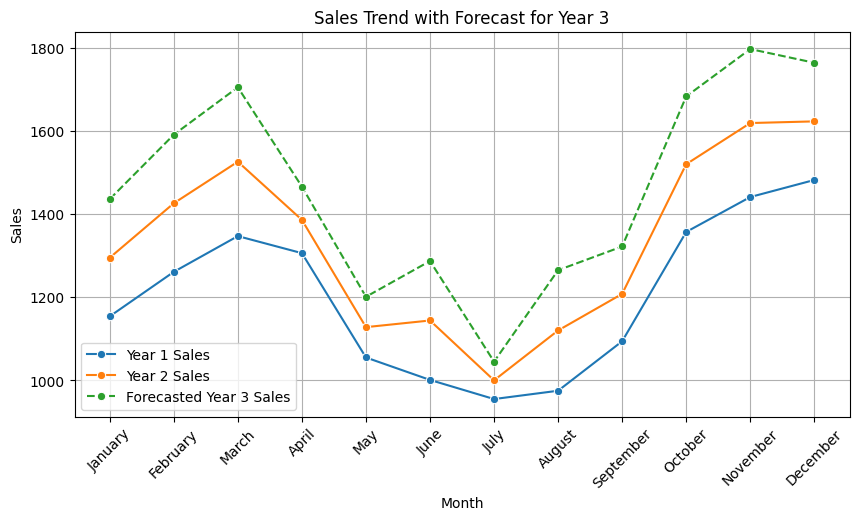

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 5))

# Plot actual sales data for Year 1 and Year 2
sns.lineplot(x=df["Month"], y=df["Year 1 Sales"], marker='o', label="Year 1 Sales")
sns.lineplot(x=df["Month"], y=df["Year 2 Sales"], marker='o', label="Year 2 Sales")

# Plot forecasted sales for Year 3 with a dashed line
sns.lineplot(x=df["Month"], y=df["Year 3 Sales"], marker='o', linestyle="dashed", label="Forecasted Year 3 Sales")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales Trend with Forecast for Year 3")
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Add grid for better visualization

# Show plot
plt.show()
